In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [1]:
import os
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Paths
DATA_DIR = 'data'
MODEL_DIR = 'models'
os.makedirs(MODEL_DIR, exist_ok=True)

# Helper: Load a txt file into a DataFrame
def load_txt(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if ';' in line:
                text, label = line.strip().split(';', 1)
                data.append((text.strip(), label.strip()))
    return pd.DataFrame(data, columns=['text', 'emotion'])

# Load data
train_df = load_txt(os.path.join(DATA_DIR, 'train.txt'))
test_df = load_txt(os.path.join(DATA_DIR, 'test.txt'))
val_df = load_txt(os.path.join(DATA_DIR, 'val.txt'))

# Combine training and validation for final training
full_train_df = pd.concat([train_df, val_df])

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(full_train_df['text'])
y_train = full_train_df['emotion']

# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=1000)  # increase max_iter to ensure convergence
model.fit(X_train, y_train)

# Evaluate on test set
X_test = vectorizer.transform(test_df['text'])
y_test = test_df['emotion']
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Save model and vectorizer
with open(os.path.join(MODEL_DIR, 'logistic_regression_model.pkl'), 'wb') as f:
    pickle.dump((vectorizer, model), f)

print("✅ Logistic Regression model trained and saved successfully to 'models/logistic_regression_model.pkl'")


Classification Report:

              precision    recall  f1-score   support

       anger       0.88      0.83      0.86       275
        fear       0.88      0.80      0.84       224
         joy       0.86      0.95      0.90       695
        love       0.81      0.66      0.73       159
     sadness       0.90      0.93      0.92       581
    surprise       0.88      0.53      0.66        66

    accuracy                           0.87      2000
   macro avg       0.87      0.78      0.82      2000
weighted avg       0.87      0.87      0.87      2000

Accuracy: 0.874
✅ Logistic Regression model trained and saved successfully to 'models/logistic_regression_model.pkl'


# Loading Model 

In [3]:
MODEL_DIR = 'models'

with open(os.path.join(MODEL_DIR, 'logistic_regression_model.pkl'), 'rb') as f:
    vectorizer, model = pickle.load(f)


In [5]:
def load_txt(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if ';' in line:
                text, label = line.strip().split(';', 1)
                data.append((text.strip(), label.strip()))
    return pd.DataFrame(data, columns=['text', 'emotion'])

test_df = load_txt(os.path.join('data', 'test.txt'))
X_test = vectorizer.transform(test_df['text'])
y_test = test_df['emotion']

In [7]:
y_pred = model.predict(X_test)


Accuracy: 0.874

Classification Report:
               precision    recall  f1-score   support

       anger       0.88      0.83      0.86       275
        fear       0.88      0.80      0.84       224
         joy       0.86      0.95      0.90       695
        love       0.81      0.66      0.73       159
     sadness       0.90      0.93      0.92       581
    surprise       0.88      0.53      0.66        66

    accuracy                           0.87      2000
   macro avg       0.87      0.78      0.82      2000
weighted avg       0.87      0.87      0.87      2000



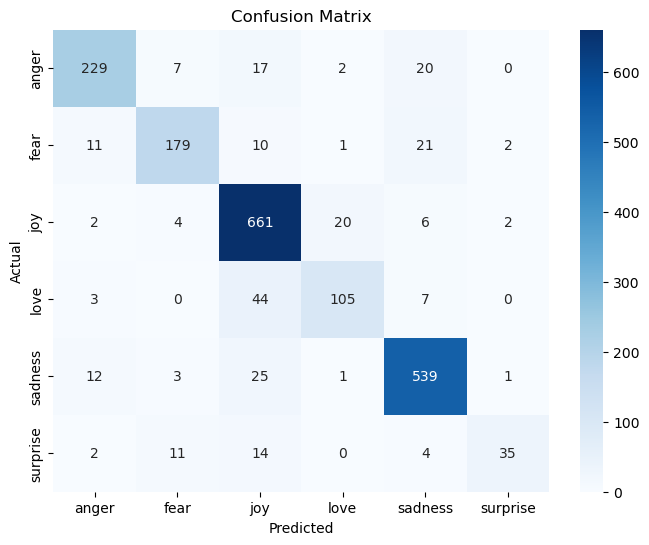

In [12]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
new_data = pd.read_csv('data/text.csv')

In [11]:
new_data.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [13]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


In [25]:
# Optional: Drop Unnamed index if exists
new_data.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# 2. Prepare features and target
X = new_data['text']
y = new_data['label']  # keep numeric for model

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Vectorize text
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 5. Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# 6. Evaluate
y_pred = model.predict(X_test_vec)

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Optional: Confusion Matrix
print("🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 7. Save model
os.makedirs('models', exist_ok=True)
with open('models/logistic_regression_model.pkl', 'wb') as f:
    pickle.dump((vectorizer, model), f)

print("✅ Model trained and saved successfully.")

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     24201
           1       0.90      0.91      0.91     28164
           2       0.76      0.76      0.76      6929
           3       0.90      0.90      0.90     11441
           4       0.83      0.83      0.83      9594
           5       0.70      0.69      0.69      3033

    accuracy                           0.88     83362
   macro avg       0.84      0.84      0.84     83362
weighted avg       0.88      0.88      0.88     83362

🧾 Confusion Matrix:
[[22479   583    56   572   458    53]
 [  394 25683  1534   145   153   255]
 [   64  1548  5239    39    25    14]
 [  614   190    37 10245   334    21]
 [  499   176    26   393  7940   560]
 [   53   234    12    12   627  2095]]
✅ Model trained and saved successfully.


Text(0.5, 1.0, 'Confusion Matrix Heatmap')

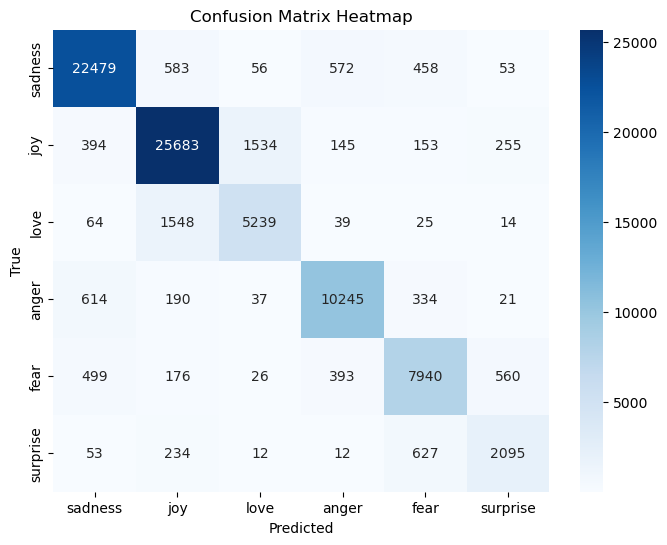

In [27]:
cm = confusion_matrix(y_test, y_pred)

# Define emotion labels (make sure they match your label numbers)
emotion_labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')